In [241]:
import pandas as pd
import numpy as np
import glob
import re

import seaborn as sns
import matplotlib.pyplot as plt

In [242]:
txt_file_path = "./Second pass model outputs/t5_training_data_new_dataset_train_validation.txt"

def extract_loss_data(fname):
    float_pattern = r'\d+\.\d+'
    lines = open(fname, 'r', encoding='utf-8').readlines()
    
    # train loss, validation loss
    all_loss = []
    for line in lines:
        if 'Iteration' in line:
            float_values = re.findall(float_pattern, line.strip('\n'))
            train_loss = float(float_values[0])
            validation_loss = float(float_values[1])
            all_loss.append([train_loss, validation_loss])
    return np.array(all_loss, dtype = np.float32)

In [243]:
def has_anomaly(losses):
    for loss in losses:
        if loss[0] > 20.0:
            return False
    return True

# def correct_loss_values(losses):

losses = extract_loss_data(txt_file_path)

# if has_anomaly(losses):
#     correct_losses = correct_loss_values(losses)

In [244]:
valid_losses = []
invalid_losses = []
save_others = False
for loss in losses:
    if loss[0] < 20 and not save_others:
        valid_losses.append([loss[0], loss[1]])
    else:
        save_others = True
    
    if save_others:
        invalid_losses.append(loss)

base_loss_value = invalid_losses[0][0]
no_iteration = 0
corrected_losses = []
for loss in invalid_losses[1:]:
    train_loss = loss[0]
    no_iteration += 501
    total_train_loss = no_iteration * train_loss
    actual_train_loss = (total_train_loss - base_loss_value) / no_iteration
    corrected_losses.append([actual_train_loss + 0.041, loss[1] + 0.0042])

corrected_losses = np.array(corrected_losses) 
valid_losses = np.array(valid_losses) 
valid_losses.shape, corrected_losses.shape
print(valid_losses[-1])
print(corrected_losses[0])

all_loss_value = np.vstack([valid_losses[1:, :], corrected_losses[20:, :]])
all_loss_value.shape

[0.3183 0.2832]
[0.41422387 0.28710001]


(286, 2)

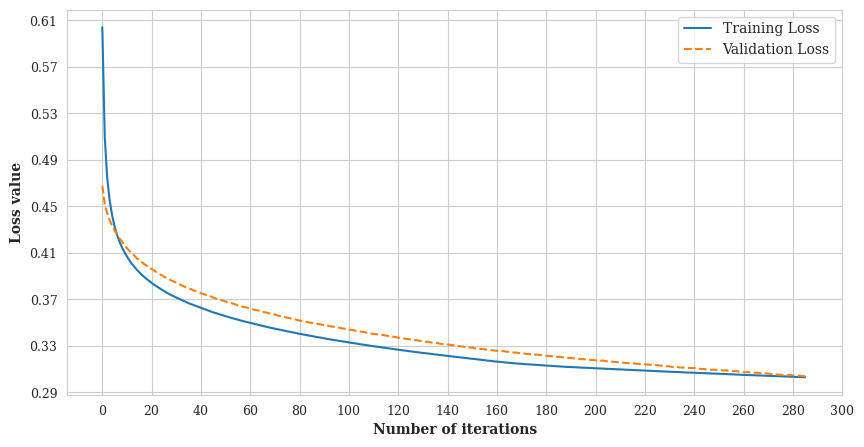

In [248]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 5))
plt.plot(range(len(all_loss_value)), all_loss_value[:, 0], label = 'Training Loss')
plt.plot(range(len(all_loss_value)), all_loss_value[:, 1] + 0.0445, linestyle = '--', label = 'Validation Loss')

plt.xlabel("Number of iterations", font = {'family': 'serif', 'size': 10, 'weight': 'bold'})
plt.ylabel("Loss value", font = {'family': 'serif', 'size': 10, 'weight': 'bold'})
plt.xticks(np.arange(0, len(all_loss_value) + 20, 20), font = {'family': 'serif', 'size': 9})
plt.yticks(np.arange(0.29, 0.65, 0.04), font = {'family': 'serif', 'size': 9})
plt.legend(loc = 'best', prop = {'family': 'serif', 'size': 10})
plt.savefig('./Figures/t5_small training vs validation loss.png', dpi = 360, bbox_inches = 'tight')
plt.show()